# An Experimental Guide on Using Proper Tools and Scores to Evaluate Photometrically Generated Redshift Estimates.
by Kai Polsterer, Antonio D'Isanto and Sebastian Lerch

This notebook visualizes the shortcomings of photometric redshift estimation, given that only a few broadband filters are used to derive the redshift $z$ by reconstructing the complex spectral energy distribution of a source. As recording the dispersed spectral information of a source is technically and exposure time wise demanding, statistical models are in favour to derive the redshift $z$ for a larger sample. Hence the integration of the spectral information through the used photometric filters leads to an irreversible, degenerate problem, a simple single value point estimate is not enough. In depends on the used filter set, the used model, and the repesentation of the estimated result, differents in the errors can be observed.

This notebook is meant to provide a playground for interested scientists to learn about different estimation methods and tool as well as scores to produce porperly calibrated redshift estimates. It also provides access to inappropriate methods, that are often used in literature to visualize their shortcommings.

We recommend the exceution in google colab as here all required software is already installed and the form element allows an easy manipulation of parameters. This notebook belongs to a talk presented at ADASS XXX https://schedule.adass2020.es/adass2020/talk/QFK89Z/.

![https://creativecommons.org/licenses/by-nc-sa/4.0/](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png "https://creativecommons.org/licenses/by-nc-sa/4.0/")

In [1]:
# install required packages
%pip install astropy
%pip install astroquery
%pip install svo_filters

     |████████████████████████████████| 6.5MB 5.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 3.2MB 53.4MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=132d75123466fcf8c6d2b1b95a56f71a71d370b25dc62be8ac382b9e85bbb1b8
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery
     |████████████████████████████████| 1.4MB 5.6MB/s 


## Synthetic Quasar Template Generation

For the experiments, we make use of the composit quasar spectrum generated and provided by Selsing et al. 2016 A&A 585, A87. http://dx.doi.org/10.1051/0004-6361/201527096 . The data is extended with the NIR fluxes from Antonio Hernán-Caballero et al. 2016 https://arxiv.org/abs/1605.04867 . In the next block the data is retrieved from VIZIER and arxiv.org, concatenated, and the generated template spectrum in plotted.

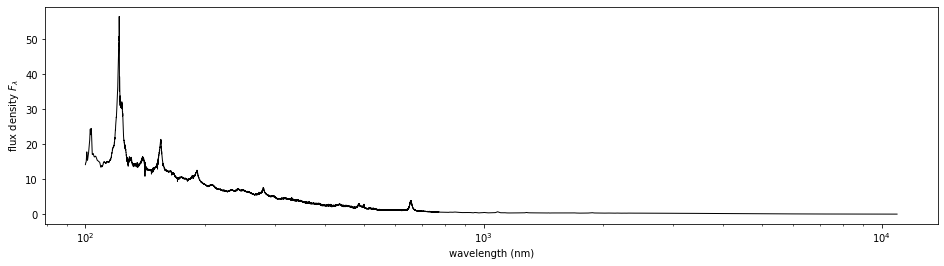

In [2]:
import numpy
import requests
import io
from astropy.io import ascii
from astroquery.vizier import Vizier
from matplotlib import pyplot

Vizier.ROW_LIMIT=999999999
quasar = Vizier.get_catalogs("J/A+A/585/A87/spectrum")[0]
wavelength1 = numpy.array(quasar['lambda'])/10.0 #Angstroem to nm
spectrum1 = numpy.array(quasar['S'])

result = requests.get("https://arxiv.org/src/1605.04867v2/anc/table3.dat")
data = ascii.read(io.BytesIO(result.content))
wavelength2 = numpy.array(data['Wave']*1000.0) #mu to nm
spectrum2 = numpy.array(3*data['Fnu_tot']/numpy.square(data['Wave'])) #F_nu to F_lambda

wavelength = numpy.concatenate((wavelength1[:16800],wavelength2[196:])) #concatenate both spectra
spectrum = numpy.concatenate((spectrum1[:16800],spectrum2[196:]))

pyplot.figure(figsize=(16,4)) #plot the concatenated quasar template spectrum
pyplot.plot(wavelength, spectrum, c="k", lw=1)
ax = pyplot.gca()
ax.set_xscale('log')
pyplot.xlabel("wavelength (nm)")
pyplot.ylabel("flux density $F_\lambda$")
pyplot.show()

## Retrieval of Filter Transmission Curves

Retrieve filter curves from the SVO http://svo2.cab.inta-csic.es/theory/fps/ in order to synthetically create photometric measures in dependents on the selected set of filters. The selected filter curves will be retrieved and plotted.

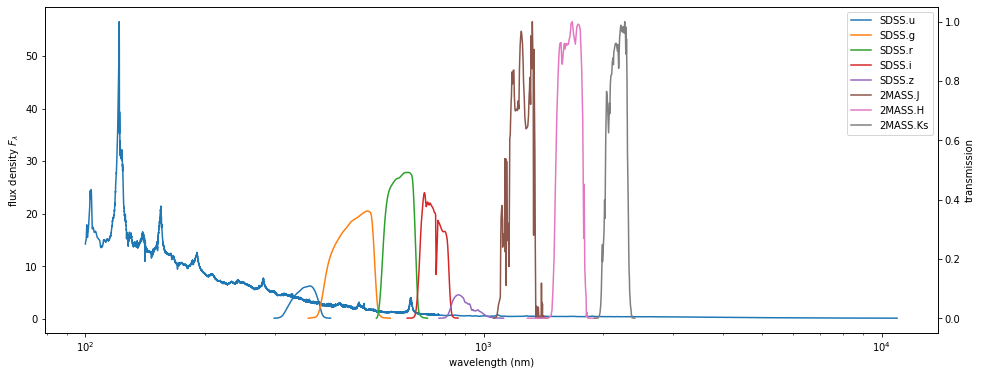

In [3]:
#@title ##Form: filter settings for synthetic photometry
from svo_filters import svo

#@markdown #### select number of filters to be used:
number_of_filters = 8 #@param {type:"slider", min:2, max:10, step:1}

#@markdown ---
#@markdown #### select filters
filter_name0 = "SDSS.u" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name1 = "SDSS.g" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name2 = "SDSS.r" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name3 = "SDSS.i" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name4 = "SDSS.z" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name5 = "2MASS.J" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name6 = "2MASS.H" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name7 = "2MASS.Ks" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name8 = "WISE.W1" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}
filter_name9 = "WISE.W2" #@param ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "Gaia.rp", "Gaia.bp", "Gaia.G", "2MASS.J", "2MASS.H", "2MASS.Ks", "WISE.W1", "WISE.W2"] {allow-input: true}

#@markdown ---
#@markdown #### plot settings
plot_spectrum = True #@param {type:"boolean"}

fig = pyplot.figure(figsize=(16,6))
ax = pyplot.gca()
ax2 = ax.twinx()

if plot_spectrum:
  ax.plot(wavelength, spectrum)
  ax.set_xscale('log')
  ax.set_ylabel("flux density $F_\lambda$")

filters = []
for i,n  in zip(range(number_of_filters), (filter_name0,filter_name1,filter_name2,filter_name3,filter_name4,filter_name5,filter_name6,filter_name7,filter_name8,filter_name9)):
  filters.append(svo.Filter(n))
  ax2.plot(filters[-1].wave[0]*1000, filters[-1].throughput[0], label=n)

ax2.set_ylabel("transmission")
pyplot.legend()
ax.set_xlabel("wavelength (nm)")
pyplot.show()

## Synthetic Creation of Photometric Catalog

Next we will synthetically create the photometric samples. Therefore, randomly redshift values in the selected range will be generated, the spectrum will be shifted accordingly, dimmed in dependence of the redshift, filtered with each filter, a magnitude value will be generated, and a measurement error will be added. This synthetic sample generation is very naive, but should be sufficient for the experiments.

In addition to the photometric values created with the shifted quasar spectrum and the selected filters, two simple relations can be used to generate alternative input features.

In [4]:
#@title ##Form: define properties of the photometric sample
from scipy.integrate import simps
from tqdm import tqdm
import math

#@markdown #### specify sample size
number_of_samples = 10000 #@param {type:"slider", min:100, max:10000, step:100}
#@markdown #### select how to generate the input data / instead of sampling from the template spectrum, two simple relations can be used
sampling = "template spectrum" #@param ["template spectrum", "e^(z+filter_number)", "sin(z*2)"] {allow-input: false}
#@markdown ---
#@markdown #### define the maximum redshift and if a redshift dependent flux scaling should be performed.
#@markdown > ####  a uniform distribution is used to generate redshifts between 0.01 and the selected value / dimming is calculated with (1+z)^-4
redshift_limit = 3 #@param {type:"slider", min:0.1, max:3, step:0.1}
redshift_dimming = True #@param {type:"boolean"}
#@markdown ---
#@markdown #### specify the brightness scaling to generate samples from sources with intrinsically different luminousities.
#@markdown > #### a uniform distibution is used to generate scalers between 1 and the selected value
max_intrinsic_brightness_scaler = 5 #@param {type:"slider", min:1, max:10, step:0.1}
#@markdown ---
#@markdown #### specify the photometric measurement error
#@markdown > #### a normal distibution is used to generate the errors
max_measurement_error = 0.1 #@param {type:"slider", min:0, max:0.5, step:0.01}

def calculate_magnitudes(z, filters, spectrum, wavelength, redshift_dimming, flux_scale):
    result = []
    for i in range(len(filters)):
        if sampling == "template spectrum":
            filter = numpy.interp(wavelength*(1.0+z), numpy.array(filters[i].wave[0]*1000), numpy.array(filters[i].throughput[0]))
            filtered = filter * spectrum
            flux = simps(filtered*1e-16, wavelength) * flux_scale
            if redshift_dimming: flux *= numpy.power((1.0+z),-4)# compensate for dimming by distance
            magnitude = -2.5*numpy.log10(flux/(10*filters[i].zp.value))
        elif sampling == "e^(z+filter_number)":
            magnitude = math.exp(z+i)
        else:
            magnitude = math.sin((z)*2)
            
        
        result.append(magnitude)
    return numpy.array(result)

numpy.random.seed(1234)
z_values = numpy.random.uniform(low=0.01, high=redshift_limit, size=number_of_samples) #uniform redshift distribution
flux_scales = numpy.random.uniform(low=1, high=max_intrinsic_brightness_scaler, size=number_of_samples) #uniform brightness variability

magnitudes = numpy.zeros((number_of_samples, number_of_filters))
for i in tqdm(range(number_of_samples), position=0, leave=True):
    magnitudes[i] = calculate_magnitudes(z_values[i], filters, spectrum, wavelength, redshift_dimming, flux_scales[i])

magnitudes = magnitudes + numpy.random.normal(scale=max_measurement_error, size=magnitudes.shape) # add a photometric measurement error
print (magnitudes.shape)

100%|██████████| 10000/10000 [00:43<00:00, 230.86it/s]

(10000, 8)


## Experimental Setup

After generating the synthetic data, we have to define which model we want to train and what loss function we would like to utilize. There are two neural networks available. One that generates a point estimate and a mixture density network that generates a mixture of gaussians to describe a PDF. The number of components as well as the loss function to use for training has to be specified, too. In addition, batch size, learning rate as well as number of epochs arecontrolling the training.

In [5]:
#@title ##Form: experiment settings
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class PhotoZ(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        return {"x": self.features[idx], "y": self.labels[idx]}

#@markdown #### define the training split
#@markdown > #### ratio between training and test data,e.g. 0.8 means 80% for training
split_factor = 0.7 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

dataset = PhotoZ(magnitudes, z_values)
split_value = int(number_of_samples*split_factor)
train_set, test_set = torch.utils.data.random_split(dataset, [split_value, number_of_samples-split_value])

#@markdown ---
#@markdown #### select the model to train
model = "mixture density network" #@param ["fully connected neural network", "mixture density network"] {allow-input: false}

#@markdown #### select number of gaussians to be used if a mixture denisty network is selected
number_of_gaussians = 3 #@param {type:"slider", min:1, max:3, step:1}

#@markdown #### select loss function for training
loss = "CRPS" #@param ["mean square error", "log-likelyhood", "CRPS"] {allow-input: false}

#@markdown ---
#@markdown #### select the batch size for training
batch_size = 64 #@param {type:"slider", min:1, max:128, step:1}
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_set, batch_size=128, shuffle=False, num_workers=1)

#@markdown #### select the learning rate for training in 1.0/(10^learning_rate)
learning_rate = -3 #@param {type:"slider", min:-8, max:-1, step:0.2}
learning_rate = math.pow(10,learning_rate)
print("learning rate =", learning_rate)

#@markdown #### select the number of epochs for training
epochs = 10 #@param {type:"slider", min:1, max:100, step:1}


learning rate = 0.001


## Definition of Loss Functions and Neural Network Architectures

In the next block, the loss functions as well as the artificial neural network architectures are defined using Pytorch.

In [6]:
import torch.nn as nn
import math

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

def unpack_gaussians(predictions):
    data = predictions.reshape(-1, 3, number_of_gaussians)
    mus = data[:,0]
    sigmas = data[:,1]
    sigmas = torch.exp(sigmas)
    weights = data[:,2]
    weights = torch.exp(weights)
    weights = weights / torch.sum(weights, axis=1)[:,None]
    return mus, sigmas, weights

def gaussian(mus, sigmas, weights, targets):
    return weights * 1.0/(sigmas*math.sqrt(2.0*math.pi)) * torch.exp(-0.5*torch.square(mus-targets[:,None])/torch.square(sigmas))

def log_score(predictions, targets):
    mus, sigmas, weights = unpack_gaussians(predictions)
    return torch.mean(-torch.log(torch.sum(gaussian(mus,sigmas,weights,targets.squeeze()), axis=1)))

def phi(x):
    return 1.0 / math.sqrt(2.0 * math.pi) * torch.exp(- torch.square(x) / 2.0)

def Phi(x):
    return 0.5 * (1.0 + torch.erf(x/math.sqrt(2.0)))

def A(mu, var):
    sigma = torch.sqrt(var)
    return 2.0* sigma * phi(mu/sigma) + mu * (2.0 * Phi(mu/sigma) - 1)

def cdf(mu, sigma, x):
    return 0.5 * (1.0 + torch.erf( (x[:,None]-mu) / (sigma * math.sqrt(2.0))))

def GaussianCRPS(predictions, targets, collect=True):
    mus, sigmas, weights = unpack_gaussians(predictions)
    crps = torch.sum(weights * A(targets.squeeze()[:,None]-mus, torch.square(sigmas)), axis=1) - 0.5*torch.sum( (weights[:, :, None]*weights[:, None, :]).reshape(-1,number_of_gaussians**2) * A((mus[:,:,None]-mus[:,None,:]).reshape(-1,number_of_gaussians**2), (torch.square(sigmas[:,:,None]) + torch.square(sigmas[:,None,:])).reshape(-1,number_of_gaussians**2)), axis=1)
#    crps = torch.sum(weights * A(targets.squeeze()[:,None]-mus, torch.square(sigmas)), axis=1)
#    for m in range(number_of_gaussians):
#        for n in range(number_of_gaussians):
#            crps -= 0.5 * weights[:,m] * weights[:,n] * A(mus[:,m]-mus[:,n], torch.square(sigmas[:,m]) + torch.square(sigmas[:,n]) )
    if collect: return torch.mean(crps)
    return crps

class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(number_of_filters, number_of_filters*2)
        self.fc2 = nn.Linear(number_of_filters*2, number_of_filters)
        self.fc3 = nn.Linear(number_of_filters, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

class MDN(nn.Module):
    def __init__(self, number_of_gaussians):
        super(MDN, self).__init__()
        self.number_of_gaussians = number_of_gaussians
        self.fc1 = nn.Linear(number_of_filters, number_of_filters*3)
        self.fc2 = nn.Linear(number_of_filters*3, number_of_filters*2)
        self.fc3 = nn.Linear(number_of_filters*2, number_of_gaussians*3)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

## Model Preparation

Depending on what we selected in the experimental setup, the neural network is instanciated, the loss functions is slected, and the network is prepared for optimization.

In [7]:
if model == "fully connected neural network":
    photo_z_model = FCNN()
    if loss == "mean square error":
        loss_function = torch.nn.MSELoss()
    else:
        raise Exception("point estimate model require MSE as a loss")

if model == "mixture density network":
    photo_z_model = MDN(number_of_gaussians)
    if loss == "mean square error":
        raise Exception("PDF estimate model require log-likelyhood or CRPS")
    if loss == "log-likelyhood":
        loss_function = log_score
    if loss == "CRPS":
        loss_function = GaussianCRPS

device = get_device()
photo_z_model.to(device)

MDN(
  (fc1): Linear(in_features=8, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=9, bias=True)
)

## Training the Neural Network

Depending on the selected parameters, the network is trained for the given number of epochs. After the training the left out test set is used to create predictions which are used to demonstrate the different evaluation tools and scores.

In [8]:
optimizer = torch.optim.Adam(photo_z_model.parameters(), lr=learning_rate)

progress_bar = tqdm(range(epochs), position=0, leave=True)

for epoch in progress_bar:
    train_loss = 0
    for item in train_dataloader:
        x = item['x']
        x = x.to(device, dtype=torch.float)
        y = item['y']
        y = y.to(device, dtype=torch.float).unsqueeze(1)
        optimizer.zero_grad()
        predictions = photo_z_model(x)
        loss_value = loss_function(predictions, y)
        train_loss += loss_value.item() * batch_size
        loss_value.backward()
        optimizer.step()

    progress_bar.set_description("Epoch " + str(epoch+1))
    progress_bar.set_postfix(loss=str(train_loss/number_of_samples))
  
results = numpy.zeros((0))
targets = numpy.zeros((0))
for item in test_dataloader:
    x = item['x']
    x = x.to(device, dtype=torch.float)
    y = item['y'].numpy()
    predictions = photo_z_model(x)
    if (results.shape==(0,)):
        results = predictions.cpu().detach().numpy()
    else:
        results = numpy.concatenate((results, predictions.cpu().detach().numpy()))
    targets = numpy.concatenate((targets, y))

targets = targets.reshape(-1,1)

Epoch 10: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s, loss=0.11382660474777222]


## Definition of Evaluation Tools

In the next block, the required tools are prepared for evaluating the estimates of the trained neural network.

In [9]:
import scipy

def shifted_gaussian(mus, sigmas, weights, x, targets):
    return weights * 1.0/(sigmas/(1+targets)*math.sqrt(2.0*math.pi)) * numpy.exp(-0.5*numpy.square(x[:,None]-mus+targets)/numpy.square(sigmas/(1+targets)))

def numpy_cdf(mus, sigmas, x):
    return 0.5 * (1.0 + scipy.special.erf( (x-mus)/ (sigmas * math.sqrt(2.0))))

def numpy_gaussian(mus, sigmas, weights, targets):
    return weights * 1.0/(sigmas*math.sqrt(2.0*math.pi)) * numpy.exp(-0.5*numpy.square(targets[:,None]-mus)/numpy.square(sigmas))

def numpy_unpack_gaussians(predictions):
    data = predictions.reshape(-1, 3, number_of_gaussians)
    mus = data[:,0]
    sigmas = data[:,1]
    sigmas = numpy.exp(sigmas)
    weights = data[:,2]
    weights = numpy.exp(weights)
    weights = weights / numpy.sum(weights, axis=1)[:,None]
    return mus, sigmas, weights

def numpy_modify_predictions(predictions, scaler):
    predictions = numpy.copy(predictions)
    for i in range(number_of_gaussians):
        predictions[:,number_of_gaussians + i] = numpy.log(numpy.exp(predictions[:,number_of_gaussians + i]) * scaler)
    return predictions

def calculated_shifted_pdf(predictions, targets, x):
    mus, sigmas, weights = numpy_unpack_gaussians(predictions)
    pdf = numpy.sum( numpy.transpose( shifted_gaussian(mus, sigmas, weights, x, targets), (1, 0, 2)), axis=2)
    return pdf

def calculate_PIT(predictions, targets):
    mus, sigmas, weights = numpy_unpack_gaussians(predictions)
    cdf = numpy_cdf(mus, sigmas, targets) * weights
    return numpy.sum(cdf, axis=1)

def calculate_FScore(predictions, targets, percent):
    lower_PIT = calculate_PIT(predictions, targets - targets * percent)
    upper_PIT = calculate_PIT(predictions, targets + targets * percent)
    return upper_PIT-lower_PIT

def generate_pdf_map(predictions, targets, maxZ=6.0, size=1000, overscan=False):
    mus, sigmas, weights = numpy_unpack_gaussians(predictions)
    map = numpy.zeros((size,size)) + 1e-16
    if overscan: extra = numpy.mean(sigmas)*2
    else: extra = 0
    y = numpy.linspace(0-extra, maxZ+extra, size).reshape((-1,1))
    for i in range(len(mus)):
        zPos = numpy.round(targets[i] / (maxZ / size))
        zPos = max(min(zPos,size-1),0)
        pdf = numpy.squeeze(numpy.sum(numpy_gaussian(mus[i], sigmas[i], weights[i], y), axis=2))
        map[:,int(zPos)] = map[:,int(zPos)] + pdf
    return map, extra

def generate_pdf_plot(predictions, targets, maxZ=6.0, size=1000, overscan=False):
    map, extra = generate_pdf_map(predictions, targets, maxZ=maxZ, size=size, overscan=overscan)
    pyplot.imshow(numpy.flipud(numpy.clip(numpy.log(map),-2,50)), interpolation="nearest", extent=[0.0,maxZ,0.0-extra,maxZ+extra])
    colorbar = pyplot.colorbar(orientation = "vertical")
    colorbar.set_label("log summed probability density",labelpad=-50)
    pyplot.xlabel("true redshift")
    pyplot.ylabel("estimated redshift")
    pyplot.title("binned PDFs")

def plot_individual_means(predictions, targets):
    mus, sigmas, weights = numpy_unpack_gaussians(predictions)
    for i in range(number_of_gaussians):
        pyplot.scatter(targets, mus[:,i], s=numpy.square(weights[:,i])*10, lw=0, label="$mean_{"+str(i)+"}$", alpha = 0.3)
    pyplot.plot([0,redshift_limit],[0,redshift_limit],c='r')
    pyplot.xlim(0, redshift_limit)
    pyplot.ylim(0, redshift_limit)
    pyplot.gca().set_aspect('equal')
    pyplot.xlabel("true redshift")
    pyplot.ylabel("estimated redshift")
    pyplot.title("individual means")
    pyplot.legend()

def plot_point_estimates(predictions, tragtes):
    pyplot.figure()
    pyplot.scatter(targets, predictions)
    pyplot.plot([0,redshift_limit],[0,redshift_limit],c='r')
    pyplot.xlim(0,redshift_limit)
    pyplot.show()

def plot_stacked_pdf(results, targets, t1, t2):
    x = numpy.linspace(-0.5,+0.5, 500)
    pdf = calculated_shifted_pdf(results, targets, x[:,None])
    maximum = numpy.max(numpy.sum(pdf, axis=0)) * 1.1
    pyplot.plot(x,numpy.sum(pdf, axis=0)) # stacking all PDFs
    pyplot.axvline(-t1,c="g")
    pyplot.axvline(t1,c="g")
    ax = pyplot.gca()
    ax.fill_betweenx((0, maximum),-t1,t1,color="g",alpha=0.1)
    pyplot.axvline(-t2,c="b")
    pyplot.axvline(t2,c="b")
    ax.fill_betweenx((0, maximum),-t2,-t1,color="b",alpha=0.1)
    ax.fill_betweenx((0, maximum),t1,t2,color="b",alpha=0.1)
    pyplot.ylim(0, maximum)
    pyplot.ylabel("coadded probability density")
    pyplot.xlabel("estimated redshift alligned to true redshift (zero point)")
    pyplot.title("stacked PDFs")

def do_analysis(results, targets, f1, f2):
    f1s = calculate_FScore(results, targets, f1)
    f2s = calculate_FScore(results, targets, f2)
    pit = calculate_PIT(results, targets)

    print("CRPS           =", GaussianCRPS(torch.tensor(results), torch.tensor(targets)).cpu().detach().numpy() )
    print("log likelihood =", -log_score(torch.tensor(results), torch.tensor(targets)).cpu().detach().numpy() )
    print("F 0.05 [68%]   =", numpy.mean(f1s))
    print("F 0.15 [90%]   =", numpy.mean(f2s))

    figure = pyplot.figure(figsize=(18,4.5))
    pyplot.subplot2grid((1,5),(0,0))
    pyplot.hist(pit, bins=20)
    pyplot.title("PIT")
    pyplot.xlim(0,1)
    pyplot.subplot2grid((1,5),(0,1))
    plot_individual_means(results, targets)
    pyplot.subplot2grid((1,5),(0,2), colspan=2)
    generate_pdf_plot(results, targets, maxZ=redshift_limit, size=200, overscan=True)
    pyplot.subplot2grid((1,5),(0,4))
    plot_stacked_pdf(results, targets, f1, f2)
    pyplot.show()

Here we execute the analysis of the estimates. When a PDF is estimated, the difference between improper and proper scores can be clearly seen. The second set of plots is created whith an artificially reduced sigma. This leads to an underdispersion in calibration and worse CRPS and log-likelihood scores. Only the improper F-score improves.

CRPS           = 0.1693068549484277
log likelihood = -0.18276801575979087
F 0.05 [68%]   = 0.1323194949390653
F 0.15 [90%]   = 0.3565255973630885


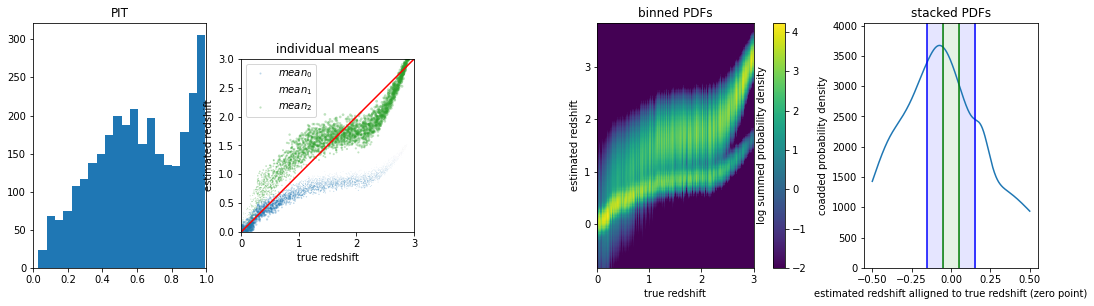

CRPS           = 0.19724877529304483
log likelihood = -40.5364734662527
F 0.05 [68%]   = 0.13530259565766975
F 0.15 [90%]   = 0.3875733588158235


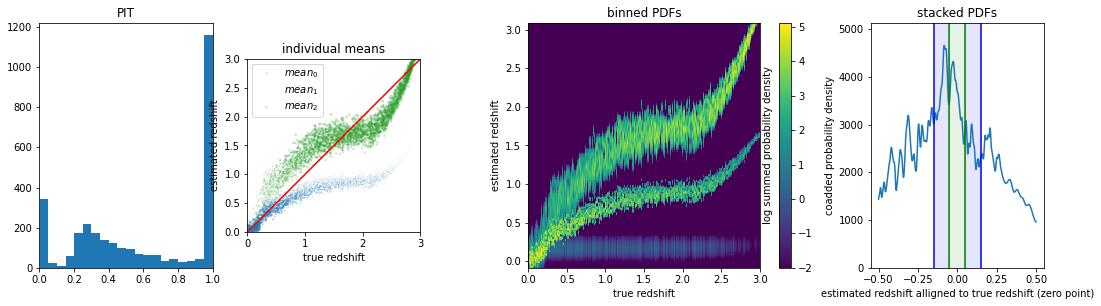

In [10]:
if model == "mixture density network":
    do_analysis(results, targets, 0.05, 0.15)
    do_analysis(numpy_modify_predictions(results, 0.1), targets, 0.05, 0.15) # note how a modified sigma leads to better f-scores but worse CRPS, LL, PIT performance
else:
    plot_point_estimates(results, targets)